<a href="https://colab.research.google.com/github/aounallahsara/ML_models/blob/main/Unsupersived_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/seeds_dataset_unsupervised.csv')

In [ ]:
data.head()

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
data.describe()

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_A                   210 non-null    float64
 1   perimeter_P              210 non-null    float64
 2   compactness_C            210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   asymmetry_coefficient    210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [ ]:
data.isna().sum()

,0
area_A,0
perimeter_P,0
compactness_C,0
length_of_kernel,0
width_of_kernel,0
asymmetry_coefficient,0
length_of_kernel_groove,0


In [ ]:
x=data.copy()


In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

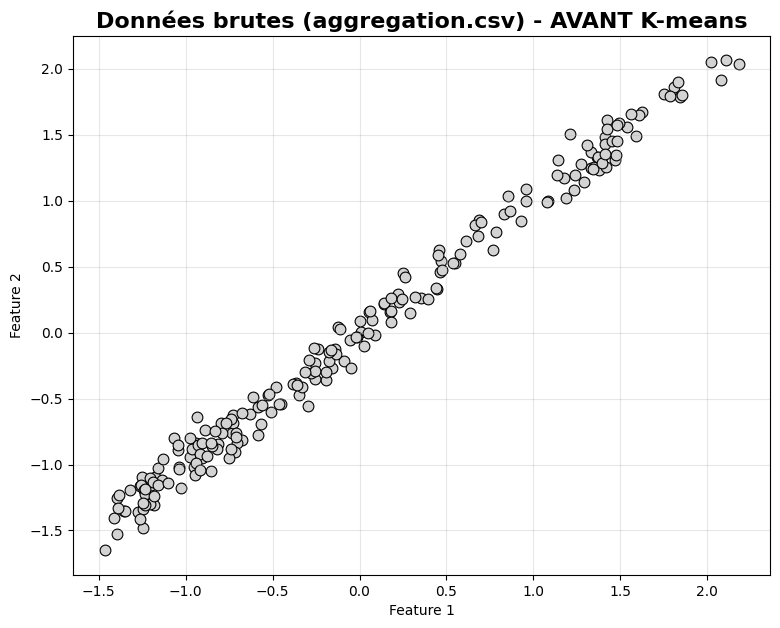

In [ ]:

plt.figure(figsize=(9, 7))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1],
            c='lightgray', edgecolors='black', s=60, linewidth=0.8)
plt.title("Données brutes (aggregation.csv) - AVANT K-means", fontsize=16, fontweight='bold')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)
plt.show()

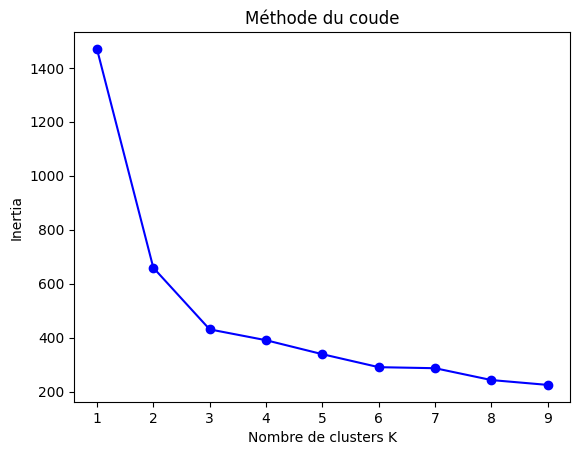

In [ ]:
# elbow method pour le top k
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, 'bo-')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Appliquer avec le K choisi (ex: k=3)
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_kmeans = kmeans.fit_predict(x_scaled)



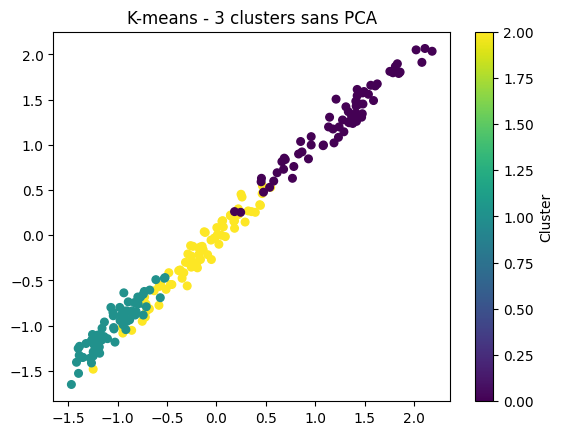

In [ ]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=labels_kmeans, cmap='viridis', s=30)
plt.title("K-means - 3 clusters sans PCA")

plt.colorbar(label='Cluster')
plt.show()

In [ ]:
labels_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

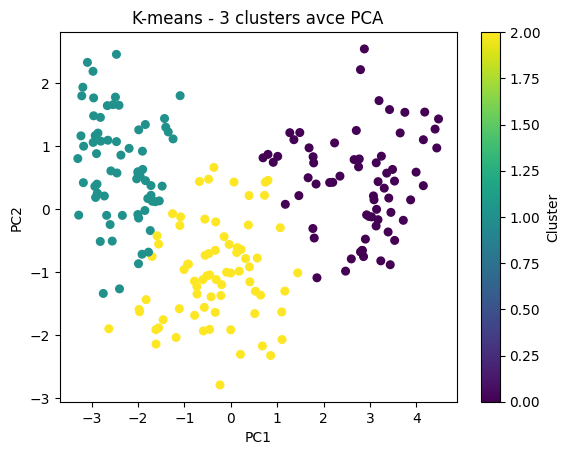

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=30)
plt.title("K-means - 3 clusters avce PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_kmeans = silhouette_score(x_scaled, labels_kmeans)
db_kmeans = davies_bouldin_score(x_scaled, labels_kmeans)
print("silhouette_score :", sil_kmeans)
print("davies_bouldin_score :", db_kmeans)

silhouette_score : 0.4024370101867174
davies_bouldin_score : 0.9220878143202835


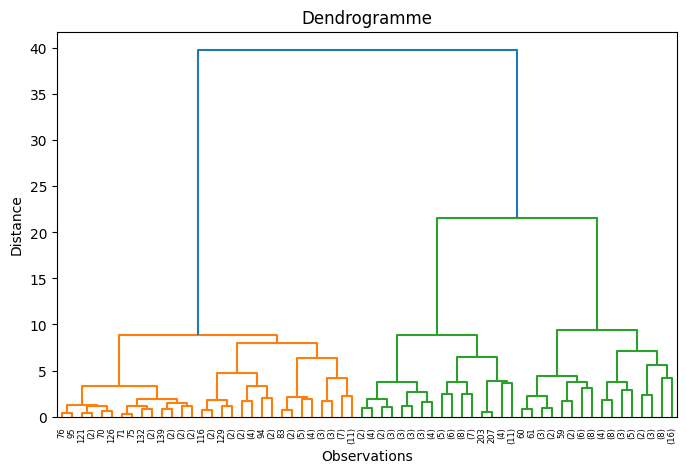

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Dendrogramme pour choisir le nombre de clusters
linked = linkage(x_scaled, method='ward')  # ou 'single', 'complete', 'average'
plt.figure(figsize=(8, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogramme')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Appliquer AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')  # ou 'complete', 'average'
labels_agg = agg.fit_predict(x_scaled)

In [ ]:
labels_agg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
sil_agg = silhouette_score(x_scaled, labels_agg)
db_agg = davies_bouldin_score(x_scaled, labels_agg)
print("silhouette_score :", sil_agg)
print("davies_bouldin_score :", db_agg)

silhouette_score : 0.3926339709101015
davies_bouldin_score : 0.9445072193243359
